## Interpolace a aproximace


In [ ]:
!python -m pip install numpy

In [ ]:
!python -m pip install matplotlib

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Aproximovaná funkce

[ 0.  2.  4.  6.  8. 10.]
[  6.  32.  90. 132. 110. -24.]


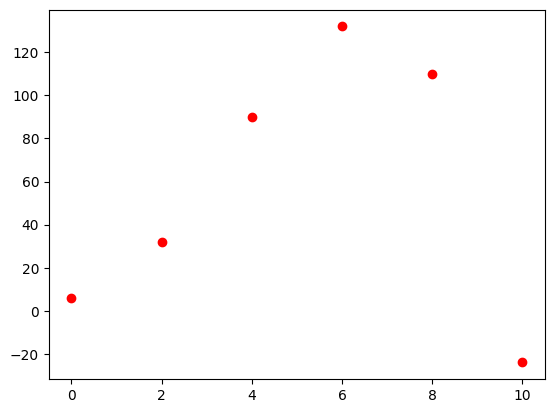

In [17]:
def f(x):                               # pro vygenerování bodů
    return -x**3 + 10*x**2 - 3*x + 6

nx = 5                                  # počet bodů
x = np.linspace(0, 10, nx)              # hodnoty xi
print(x)

y = f(x)                                # hodnoty f(xi)
print(y)

plt.plot(x, y, "ro")
plt.show()

#### Lineární interpolace
Mějme sadu uzlových bodů $\{ x_0,x_1,...,x_n\}$ a k nim příslušné hodnoty funkce $f(x)$, $\{f_0,f_1,...,f_n\}$ Poté mezi sousedícími uzlovými body $x_i$ a $x_{i+1}$ aproximujeme funkci $f(x)$ úsečkou $g(x)$ tak, že platí
$$g(x) = f(x_i) + \frac{f(x_{i+1}) - f(x_i)}{x_{i+1} - x_i} \left(x - x_i \right)$$


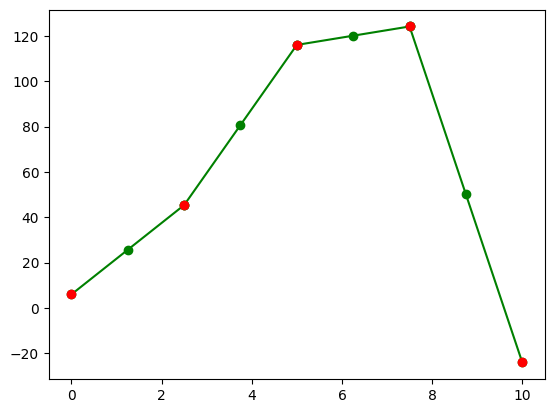

In [19]:
def linear(x, x1, x2, y1, y2):
    return y1 + (y2-y1)/(x2-x1)*(x-x1)                  # lineární interpolace

ynew = []                                               # nové hodnoty y (na úsečkách)
xnew = []                                               # nové hodnoty x

nint = 3                                                # počet bodů na úsečce (vč. krajních)
x = np.linspace(0, 10, 5)                               # hodnoty xi
y = np.array([6, 45.375, 116, 124.125, -24])            # stávající hodnoty yi (z předchozího př.)
for i in range(len(x)-1):                               # přes všechny úsečky (len(x) počet bodů)
    xint = np.linspace(x[i], x[i+1], nint)              # body, které mě zajímají na úsečce; x[i] a x[i+1] krajní body
    yint = linear(xint, x[i], x[i+1], y[i], y[i+1])     # hodnoty y bodů na úsečce
    xnew.extend(xint)                                   # rozšíření xi o nové body (x)
    ynew.extend(yint)                                   # rozšíření fi o nové body (y)

plt.plot(xnew, ynew, "go-")                             # nové body (vykreslení a pospojování)
plt.plot(x, y, "ro")                                    # původní body
plt.show()

[ 0.   2.5  5.   7.5 10. ] [  6.     45.375 116.    124.125 -24.   ]


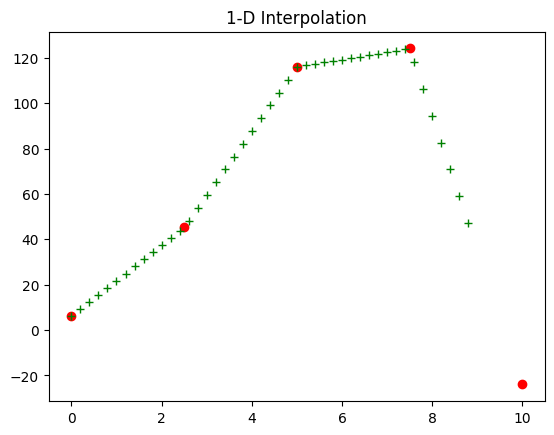

In [4]:
from scipy import interpolate

phi = interpolate.interp1d(x, y)            # pole x a hodnot v nich
print(phi.x, phi.y)
xnew = np.arange(0, 9, 0.2)                 # max. do 10.2
ynew = phi(xnew)                            # hodnoty v interpolovaných bodech (i na úsečkách)
  
plt.title("1-D Interpolation")
plt.plot(x, y, 'ro', xnew, ynew, 'g+')      # vyzkoušejte místo g- např. g+
plt.show()

#### Vandermondova matice
$$
\begin{alignat*}{5}
  a_0 +& a_1x_0+& a_2x_0^2+& ...+&a_nx_0^n &=f(x_0)\\
  a_0 +& a_1x_1+& a_2x_1^2+& ...+&a_nx_1^n &=f(x_1)\\
  .... & ~& ~& ~&~&~\\
  a_0 +& a_1x_n+& a_2x_n^2+& ...+&a_nx_n^n &=f(x_n)\\
\end{alignat*}
$$

Způsob vytvoření Vandermondovy matice

In [6]:
p = np.array([1,3,5])                   # vytvoření pro 3 hodnoty x
print(p)
print(np.vander(p))                     # ve sloupcích vždy mocniny původního vektoru
print(np.vander(p,increasing=True))     # rostoucí

[1 3 5]
[[ 1  1  1]
 [ 9  3  1]
 [25  5  1]]
[[ 1  1  1]
 [ 1  3  9]
 [ 1  5 25]]


Příklad: Proložte polynom pomocí Vandermondovy matice

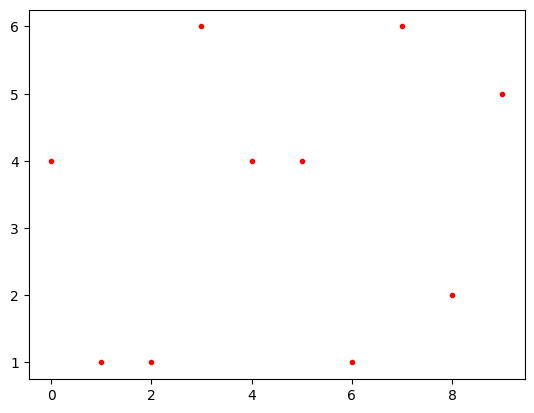

In [21]:
# zadání
N = 10                              # 10 bodů
x = np.arange(0,N)                  # 0 až 9
y = np.random.randint(0,10,N)       # vektor náhodných hodnot
plt.plot(x, y, 'r.')
plt.show()

In [23]:
# 1. vytvoření Vandermondovy matice z hodnot x
X = np.vander(x, increasing=True)        # velikost x z předchozího případu 10
print(X[:5, :])                         # prvních pět řádků (z 10 x 10)

[[     1      0      0      0      0      0      0      0      0      0]
 [     1      1      1      1      1      1      1      1      1      1]
 [     1      2      4      8     16     32     64    128    256    512]
 [     1      3      9     27     81    243    729   2187   6561  19683]
 [     1      4     16     64    256   1024   4096  16384  65536 262144]]


In [24]:
# 2. koeficienty ai jako řešení soustavy
import scipy.linalg as la
a = la.solve(X, y)          # koeficienty interpolačního polynomu
print(a)

[ 4.00000000e+00  1.37646825e+02 -3.61968849e+02  3.61363646e+02
 -1.87217708e+02  5.63800926e+01 -1.02479167e+01  1.10780423e+00
 -6.55257936e-02  1.63139330e-03]


$P_n(x_i)=a_0+a_1x_i+a_2x_i^2+...+a_nx_i^n$

Aplikace vypočtených koeficientů polynomu

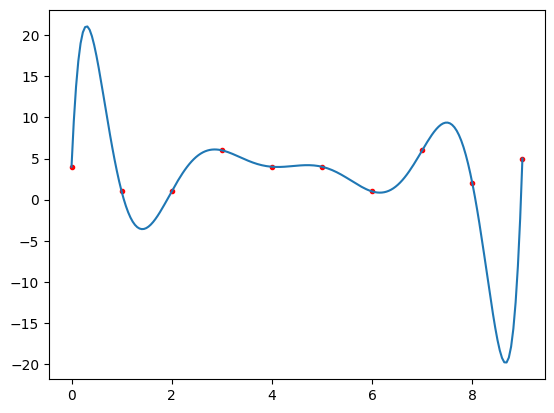

In [25]:
# 3. sestavení polynomu z koeficientů ai
xs = np.linspace(0, N-1, 200)                   # nové body pro vykreslení polynomu
ys = sum([a[k] * xs**k for k in range(0, N)])   # hodnoty v nich (součet mocnin)
plt.plot(x, y, 'r.', xs, ys)                    # červeně body, modře čára z nových bodů
plt.show()

#### Lagrangeova interpolace
Označíme

- čitatele: $\qquad \ell_i(x) = (x-x_0)..(x-x_{i-1})(x-x_i)(x-x_{i+1})...(x-x_n)$
- jmenovatele: $\ell_i(x_i) = (x_i-x_0)..(x_i-x_{i-1})(x_i-x_i)(x_i-x_{i+1})...(x_i-x_n)$, 
    - přičemž stejné čeny vynecháváme
- zbytek: $\qquad E_n = f[x,x_0,x_1,x_2,x_3](x-x_0)..(x-x_{i-1})(x-x_i)(x-x_{i+1})...(x-x_n)$

Dostaneme obecný Lagrangeův interpolační vzorec ve tvaru

$$f(x) = \sum_{i=0}^{n} f(x_i)\frac{\ell_i(x)}{\ell_i(x_i)} + E_n$$


[0.   0.25 0.5  0.75 1.  ]
[1.   1.25 1.5  1.75 2.  ]
[2.   2.25 2.5  2.75 3.  ]
[3.   3.25 3.5  3.75 4.  ]
[4.   4.25 4.5  4.75 5.  ]
[5.   5.25 5.5  5.75 6.  ]
[6.   6.25 6.5  6.75 7.  ]
[7.   7.25 7.5  7.75 8.  ]
[8.   8.25 8.5  8.75 9.  ]


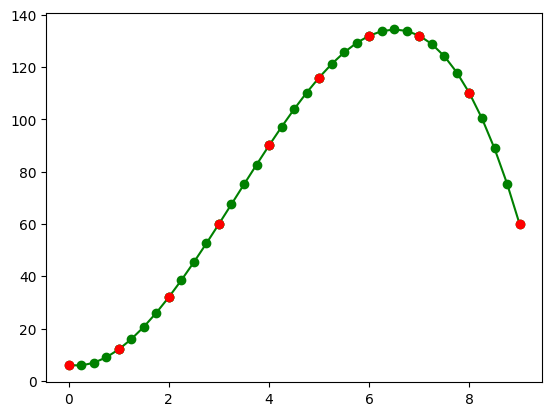

In [27]:
import numpy as np, matplotlib.pyplot as plt
def f(x):                               # funkce ke generování bodů
    return -x**3 + 10*x**2 - 3*x + 6

def lagrange(x, y, xi, n):              # vektory daných bodů x a y, pole nových bodů xi, jejich počet n
    
    Ln = 0                              # inicializace L
    for i in range(n):                  # suma přes i
        li = y[i]                       # dílčí členy li (inicializovat jako f(xi))
        for j in range(n):
            if j != i:
                li = li * (xi - x[j]) / (x[i] - x[j])
        Ln += li                        # přidat dílčí členy li k výsledku
    return Ln

x = np.linspace(0, 9, 10)               # definice daných bodů (celkem 10)
y = f(x)

xnew = []                               # nové (interpolované) body
ynew = []

nint = 5                                # počet nových bodů

for i in range(len(x) - 1):             # přes všechny úseky
    xint = np.linspace(x[i], x[i+1], nint)
    print(xint)                         # vektor nových x na jednom úseku
    g = lagrange(x, y, xint, len(x))
    xnew.extend(xint)                   # rozšíření seznamu o nové body
    ynew.extend(g)

plt.plot(xnew, ynew, "go-")
plt.plot(x, y, "ro")
plt.show()

#### Cvičení
Najděte Lagrangeův interpolační polynom zadaný body $x_i = \{ -1,0,2,3\}$ a funkčmními hodnotami $f_i = \{ 5,10,2,1\}$. Vykreslete polynom spolu s uzlovými body.


**Řešení:** $f(x) = x^3 - 4x^2 + 10$


Využijeme modul inperpolate knihovny SciPy

   3     2
1 x - 4 x + 3.053e-16 x + 10
[ 1.00000000e+00 -4.00000000e+00  3.05311332e-16  1.00000000e+01]


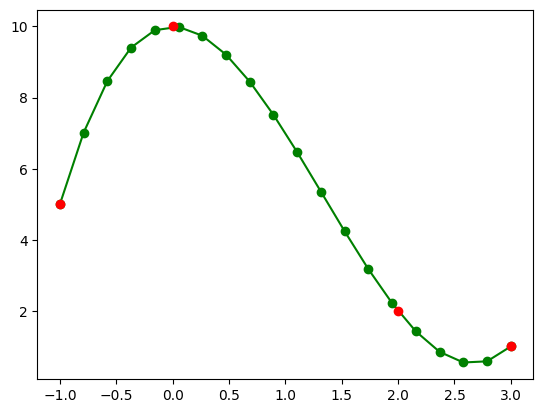

In [31]:
from scipy.interpolate import lagrange

x = np.array([-1, 0, 2, 3])         # definice daných bodů (celkem 4)
y = np.array([5, 10, 2, 1])

phi = lagrange(x, y)                # vrátí polynom (typ numpy.poly1d)
print(phi)                          # polynom (první řádek exponenty)
print(phi.coef)                     # koeficienty

n = 20                              # počet nových bodů
xnew = np.linspace(x[0], x[-1], n)  # nové body
plt.plot(xnew, phi(xnew), "go-")
plt.plot(x, y, "ro")
plt.show()

#### Cvičení
Najděte Lagrangeův interpolační polynom zadaný body $x_i = \{ -1,0,1,3\}$ a funkčními hodnotami $f_i = \{ 2,1,2,0\}$. Vykreslete polynom spolu s uzlovými body.


**Řešení:** $f(x) = \frac{1}{15} \left( -5x^3 + 12x^2 + 5x + 12 \right)$


Řešíme stejným způsobem

         3     2
-0.4167 x + 1 x + 0.4167 x + 1
[-0.41666667  1.          0.41666667  1.        ]


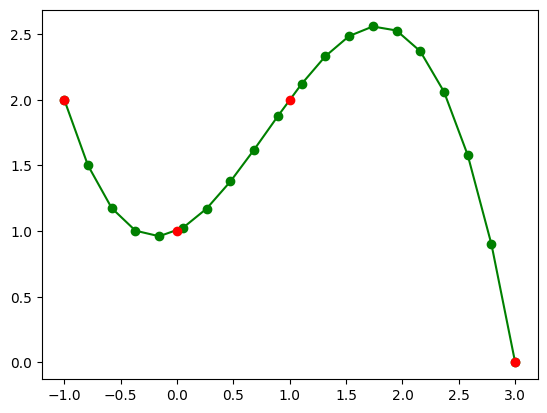

In [32]:
from scipy.interpolate import lagrange

x = np.array([-1, 0, 1, 3])
fx = np.array([2, 1, 2, 0])

phi = lagrange(x, fx)
print(phi)
print(phi.coef)

n = 20
xnew = np.linspace(x[0], x[-1], n)
plt.plot(xnew, phi(xnew), "go-")
plt.plot(x, fx, "ro")
plt.show()

#### Newtonova metoda
$$
P_n(x) = f_0 + f[x_0,x_1](x-x_0) + f[x_0,x_1,x_2](x-x_0)(x-x_1)(x-x_2) + ... + f[x_0,..,x_n](x-x-0)..(x-x_{n-1})
$$


[[-13.   5.  -1.   1.]
 [  2.   1.   4.   0.]
 [  3.   9.   0.   0.]
 [ 12.   0.   0.   0.]]


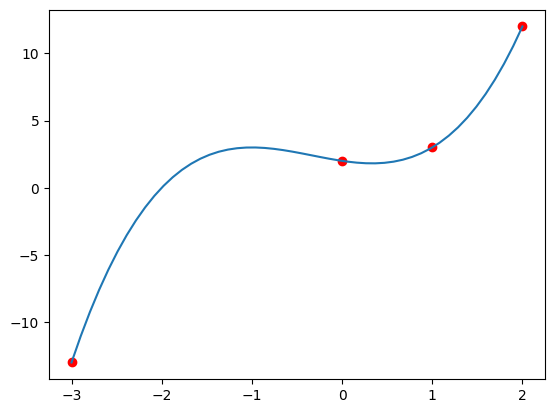

In [13]:
import numpy as np
import matplotlib.pyplot as plt
def divided_diff(x, y):                 # výpočet diferencí
    n = len(y)
    coef = np.zeros([n, n])             # inicializace matice koeficientů
    coef[:,0] = y                       # první sloupec hodnoty y
    for j in range(1,n):
        for i in range(n-j):            # prvky vlevo nahoře
            coef[i][j] = \
                (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])
    return coef                         # koeficienty ve formě matice

def newton_poly(coef, x_data, x):       # výpočet Newtonova interpolačního polynomu
    n = len(x_data) - 1                 # původní hodnoty x
    p = coef[n]                         # inicializujeme hodnotou f[...]
    for k in range(1,n+1):
        p = coef[n-k] + (x - x_data[n-k])*p
    return p

x = np.array([-3, 0, 1, 2])             # body ze cvičení
y = np.array([-13, 2, 3, 12])

print(divided_diff(x, y))               # koeficienty poměrných diferencí
a_s = divided_diff(x, y)[0, :]          # první řádek matice

#x_new = np.arange(x[0], x[-1], .1)      # nové body
x_new = np.linspace(x[0], x[-1], 50)    # nové body
y_new = newton_poly(a_s, x, x_new)

plt.plot(x, y, 'ro')
plt.plot(x_new, y_new)
plt.show()


Pomocí Newtontova polynomu proveďte interpolaci funkce zadané 4 body, kde $x_i = \{-1,0,1,2\}$ a $f_i = \{ 2,1,2,0\}$. Pro realizaci budeme tedy uvažovat poměrné diference $(n+1)$. řádu

[ 2.         -1.          1.         -0.83333333]


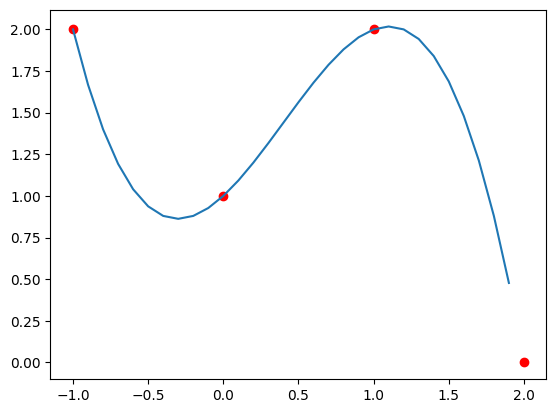

In [14]:
# použijeme funkce definované v předchozím příkladu
x = np.array([-1, 0, 1, 2])
y =  np.array([2, 1, 2, 0])

a_s = divided_diff(x, y)[0, :]
print(a_s)

x_new = np.arange(x[0], x[-1], .1)
y_new = newton_poly(a_s, x, x_new)

plt.plot(x, y, 'ro')
plt.plot(x_new, y_new)
plt.show()

Pomocí Newtontova polynomu proveďte interpolaci funkce zadané 4 body, kde $x_i = \{-1,0,1,3\}$ a $f_i = \{ 2,1,2,0\}$. Pro realizaci budeme tedy uvažovat poměrné diference $(n+1)$. řádu


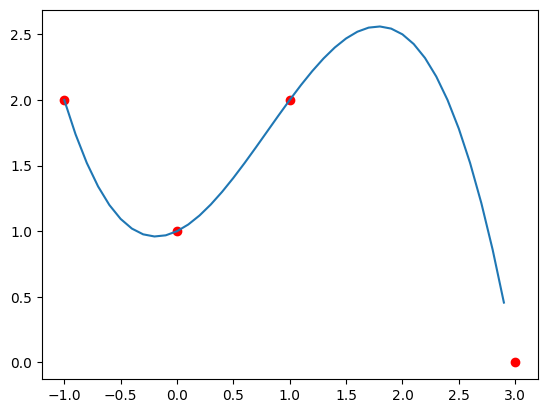

In [15]:
# použijeme funkce definované v předchozím příkladu
x = np.array([-1, 0, 1, 3])
y =  np.array([2, 1, 2, 0])

a_s = divided_diff(x, y)[0, :]

x_new = np.arange(x[0], x[-1], .1)
y_new = newton_poly(a_s, x, x_new)

plt.plot(x, y, 'ro')
plt.plot(x_new, y_new)
plt.show()

#### Cvičení
Aproximujte funkci $f(x) = \frac{1}{x}$ Newtonovým interpolačním polynomem v uzlových bodech $x_i = \{ 1,2,2.5,3.2,4 \}$. Poté pomocí polynomu vypočtěte hodnoty v bodech $x_j = \{3,10\}.$


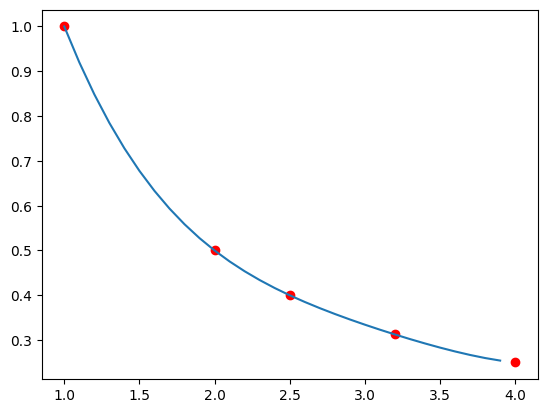

In [16]:
# použijeme funkce definované v předchozím příkladu
x = np.array([1, 2, 2.5, 3.2, 4])
y =  np.array(list(map(lambda x: 1/x, x)))

a_s = divided_diff(x, y)[0, :]

x_new = np.arange(x[0], x[-1], .1)
y_new = newton_poly(a_s, x, x_new)

plt.plot(x, y, 'ro')
plt.plot(x_new, y_new)
plt.show()

Najděte Newtonův a Lagrangeův interpolační polynom zadaný body $x_i = \{ -1,0,2,3\}$ a funkčními hodnotami $f_i = \{ 5,10,2,1\}$. Vykreslete polynom spolu s uzlovými body. Porovnejte jejich výsledné tvary.


   3     2
1 x - 4 x + 3.053e-16 x + 10


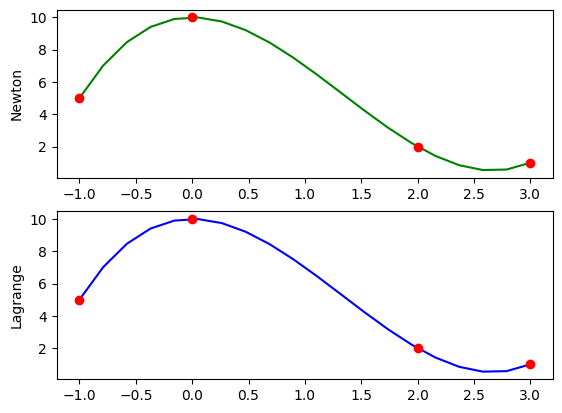

In [17]:
# Porovnání s výpočtem pomocí scipy
x = np.array([-1, 0, 2, 3])
y =  np.array([5, 10, 2, 1])
n = 20
xphi = np.linspace(x[0], x[-1], n)

# nejprve naše funkce
a_s = divided_diff(x, y)[0, :]
phi_newton = newton_poly(a_s, x, xphi)

# nyní pomocí scipy
from scipy.interpolate import lagrange
phi_lagrange = lagrange(x, y)       # funkce scipy
print(phi_lagrange)                 # v 1. řádku výpisu mocniny

fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.set_ylabel('Newton')
ax1.plot(xphi, phi_newton, 'g-')
ax1.plot(x, y, "ro")
ax2.set_ylabel('Lagrange')
ax2.plot(xphi, phi_lagrange(xphi), 'b-')
ax2.plot(x, y, "ro")
plt.show()

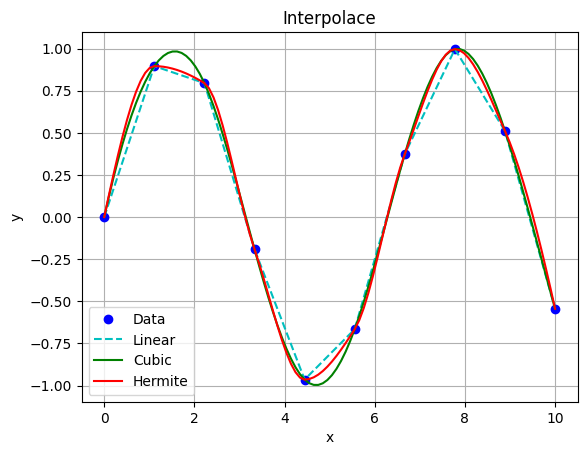

In [1]:
# různé způsoby interpolace ze scipy
import numpy as np
from scipy.interpolate import interp1d, PchipInterpolator, CubicSpline
import matplotlib.pyplot as plt

# Data
x = np.linspace(0, 10, 10)
y = np.sin(x)

# Interpolace pomocí různých metod
lin_interp = interp1d(x, y)                 # lineární
cubs_interp = CubicSpline(x, y)             # kubický spline
pchip_interp = PchipInterpolator(x, y)      # hermitte

# Nové body pro vykreslení
x_new = np.linspace(0, 10, 100)
y_l = lin_interp(x_new)
y_c = cubs_interp(x_new)
y_h = pchip_interp(x_new)

# Vykreslení původních bodů a interpolované křivky
plt.plot(x, y, 'bo', label='Data')
plt.plot(x_new, y_l, 'c--', label='Linear')
plt.plot(x_new, y_c, 'g-', label='Cubic')
plt.plot(x_new, y_h, 'r-', label='Hermite')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolace')
plt.legend()
plt.grid(True)
plt.show()


#### Aproximace metodou nejmenších čtverců
$$E(c_1,...,c_m) = \sum_{i=0}^{n} \left[ f_i - P(x_i) \right]^2 = \sum_{i=0}^{n} \left[ f_i - \sum_{j=0}^m c_j P_j(x) \right]^2$$


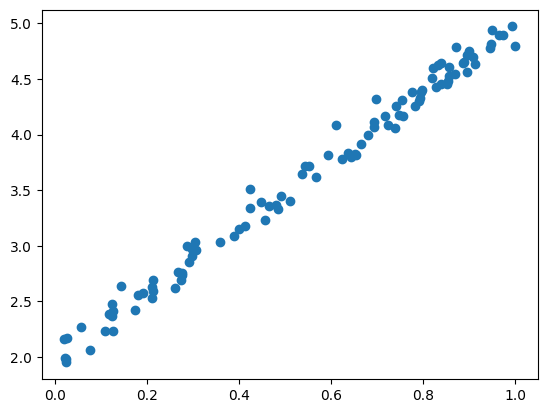

In [2]:
import numpy as np, matplotlib.pyplot as plt
a0 = 2                              # skutečné parametry přímky
a1 = 3
N = 100
x = np.random.rand(100)             # vektor 100 náh. čísel 0 až 1
noise = 0.1 * np.random.randn(100)  # normální rozdělení
y = a0 + a1*x + noise               # bez šumu by byly body na přímce
plt.scatter(x,y)
plt.show()

In [5]:
X = np.column_stack([np.ones(N),x])     # spojí 2 vektory do 2D pole
print(X.shape)
print(X[:5,:])                          # výpis prvních 5 řádků

(100, 2)
[[1.         0.42402228]
 [1.         0.73850745]
 [1.         0.87125709]
 [1.         0.02377756]
 [1.         0.75641292]]


$$\sum_{j=0}^{m}c_j\sum_{i=0}^{n}P_j(x_i)P_k(x_i)=\sum_{i=0}^{n}f\left(x_i\right)P_k(x_i)$$

In [6]:
# řešení bez pomoci numpy.lstsq (scipy)
print("X (začátek):\n",X[:5])
print("X.T @ X:\n", X.T @ X)      # matice 2 x 2
print("X.T @ y:\n", X.T @ y)      # vektor (2 prvky)
import scipy.linalg as la
a = la.solve(X.T @ X, X.T @ y)
print("\nKoeficienty:", a)

X (začátek):
 [[1.         0.42402228]
 [1.         0.73850745]
 [1.         0.87125709]
 [1.         0.02377756]
 [1.         0.75641292]]
X.T @ X:
 [[100.          54.5177156 ]
 [ 54.5177156   38.52260931]]
X.T @ y:
 [362.3519852 223.865134 ]

Koeficienty: [1.99314723 2.9905373 ]


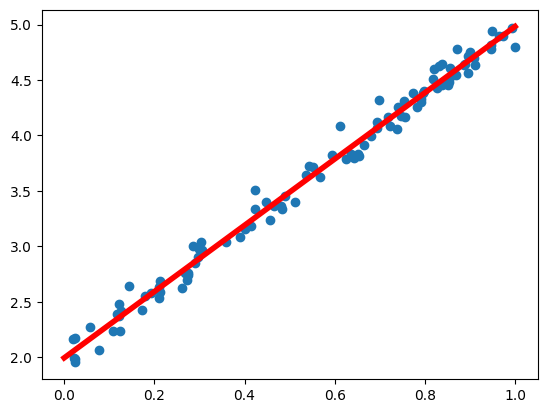

In [7]:
xs = np.linspace(0,1,10)
ys = a[0] + a[1]*xs                 # teoreticky 2 a 3
plt.plot(xs,ys,'r',linewidth=4)
plt.scatter(x,y)
plt.show()

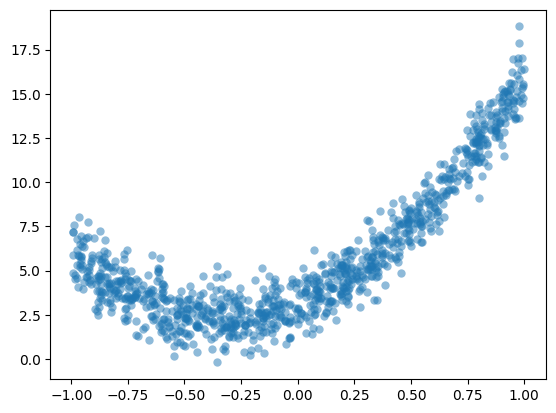

In [8]:
a0 = 3
a1 = 5
a2 = 8
N = 1000
x = 2*np.random.rand(N) - 1             # na x náhodná čísla v intervalu (-1,1)
noise = np.random.randn(N)              # normální rozdělení modifikuje y
y = a0 + a1*x + a2*x**2 + noise
plt.scatter(x,y,alpha=0.5,lw=0)         # alpha průhlednost, lw šířka okraje
plt.show()

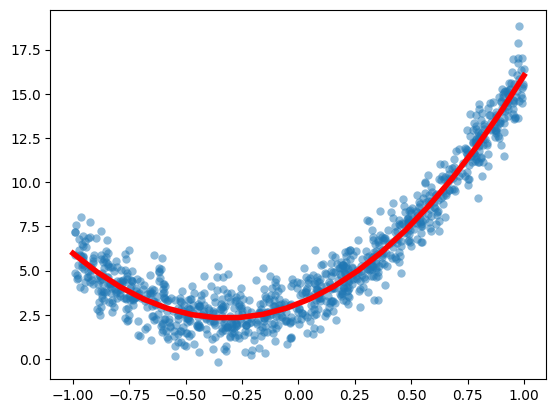

In [9]:
X = np.column_stack([np.ones(N),x,x**2])
a = la.solve((X.T @ X),X.T @ y)
xs = np.linspace(-1,1,20)
ys = a[0] + a[1]*xs + a[2]*xs**2
plt.plot(xs,ys,'r',linewidth=4)
plt.scatter(x,y,alpha=0.5,lw=0)
plt.show()

Totéž pomocí knihovny numpy

[7.87864722 5.0262077  3.11978916]


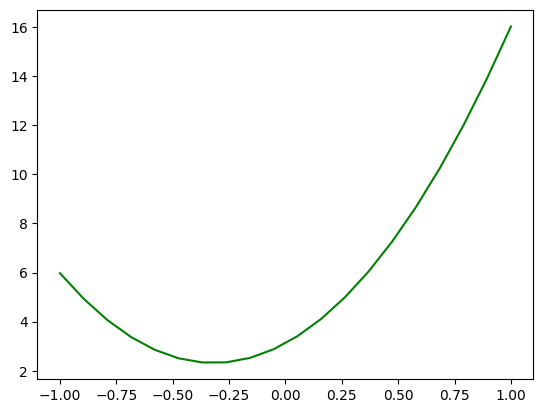

In [15]:
coefficients = np.polyfit(x, y, deg=2)  # nejlépe odpovídající polynom (metodou nejmenších čtverců)
print(coefficients)                     # pole koeficientů (od nejvyšší mocniny)
polynom = np.poly1d(coefficients)       # jako vstup koeficienty polynomu
xs = np.linspace(-1,1,20)
plt.plot(xs, polynom(xs), "g-")
plt.show()


Mějme funkci zadanou sadou uzlových bodů $x_i = \{1,2,3,5\}$ a k nim příslušných funkčních hodnot $f_i = \{ 3,3,1,2\}$. Aproximujme ve smyslu metody nejmenších čtverců tuto funkci pomocí funkce $P_j(x) = x^j$.


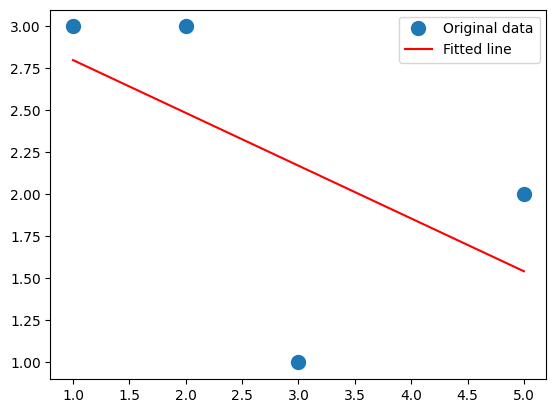

In [16]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1, 2, 3, 5])
y = np.array([3, 3, 1, 2])

k, q = np.polyfit(x, y, 1)      # provádí lineární regresi pomocí polyfit

plt.plot(x, y, 'o', label='Original data', markersize=10)
plt.plot(x, k*x + q, 'r', label='Fitted line')
plt.legend()
plt.show()


Řešení pomocí funkce *lstsq* z modulu linalg knihovny numpy. 

Výstupem funkce *np.linalg.lstsq(A, y)* je n-tice obsahující:

- *x*: Koeficienty m a c pro nejlepší přímku
- *residuals*: Norma reziduí (velikost vektoru)
- *rank*: Hodnost matice A
- *singular_values*: Singulární hodnoty matice A

Výhody *lstsq* oproti *numpy.polyfit*
- nejen pro polynomiální regresi
- jakákoliv matice

[[1. 1.]
 [2. 1.]
 [3. 1.]
 [5. 1.]]


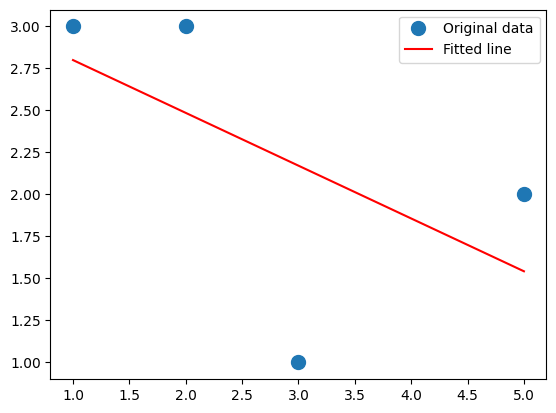

In [40]:
x = np.array([1, 2, 3, 5])
y = np.array([3, 3, 1, 2])
A = np.vstack([x, np.ones(len(x))]).T           # A obsahuje sloupec x a sloupec 1 (pro lineární regresi)
#A = np.column_stack([x, np.ones(len(x))])
print(A)

m, c = np.linalg.lstsq(A, y, rcond=None)[0]     # lineární regrese (koeficienty m a c pro nejlepší přímku)

plt.plot(x, y, 'o', label='Original data', markersize=10)
plt.plot(x, m*x + c, 'r', label='Fitted line')
plt.legend()
plt.show()

Vyberte si jednu z funkcí, které byly výše řešeny pomocí Lagrangeova nebo Newtonova polynomu a zkuste aproximovat tuto funkci také metodou nejmenších čtverů. Jako aproximační funkci volte jak lineární funnkci, tak polynom vyššího řádu a porovnejte napříkald i přesnost polynomu při aproximaci a interpolaci.


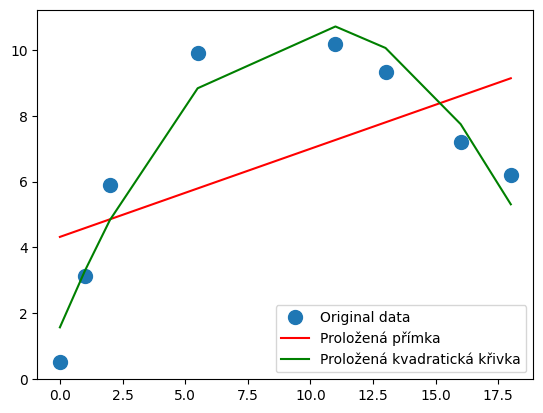

In [61]:
# pomocí np.lstsq
x = np.array([0, 1, 2, 5.5, 11, 13, 16, 18])
y =  np.array([0.5, 3.134, 5.9, 9.9, 10.2, 9.35, 7.2, 6.2])

A = np.vstack([x, np.ones(len(x))]).T                   # matice pro proložení přímkou
m, c = np.linalg.lstsq(A, y, rcond=None)[0]             # proložení přímkou

A2 = np.vstack([x**2, x, np.ones(len(x))]).T            # matice pro proložení parabolou
coefficients = np.linalg.lstsq(A2, y, rcond=None)[0]    # proložení parabolou

plt.plot(x, y, 'o', label='Original data', markersize=10)
plt.plot(x, m*x + c, 'r', label='Proložená přímka')
plt.plot(x, np.dot(A2, coefficients), 'g', label='Proložená kvadratická křivka')

plt.legend()
plt.show()

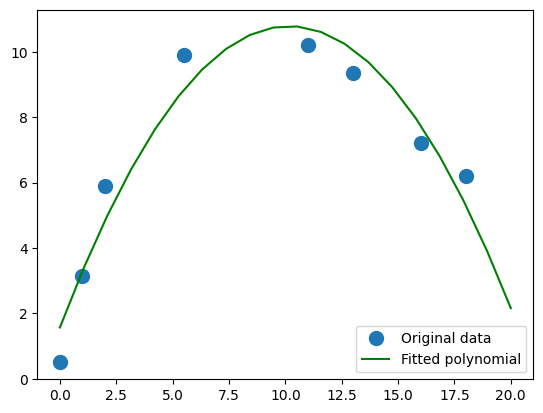

In [63]:
# pomocí np.polyfit
x = np.array([0, 1, 2, 5.5, 11, 13, 16, 18])
y =  np.array([0.5, 3.134, 5.9, 9.9, 10.2, 9.35, 7.2, 6.2])

degree = 2              # proložení polynomem vyššího řádu (např. 2)
coefficients = np.polyfit(x, y, degree)
poly = np.poly1d(coefficients)
xnew = np.linspace(0, 20, 20)

plt.plot(x, y, 'o', label='Original data', markersize=10)
plt.plot(xnew, poly(xnew), 'g', label='Fitted polynomial')

plt.legend()
plt.show()